# Prosper Loan Data Presentation
## Umar Faruq Zubairu
Date 20/08/2022

## Investigation Overview

In this investigation, I'm most interested in figuring out What features affect a loan’s outcome. I am also interesed on finding if there are differences between loans depending on how large the original loan amount was.

## Dataset Overview

There are 113,937 records in the dataset with 11 features (MemberKey, Term, LoanStatus, BorrowerRate, ListingCategory (numeric), EmploymentStatus, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, Recommendations and Investors)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the data into a dataframe
loan_df=pd.read_csv('prosperLoanData.csv')

In [3]:
#Extracting the columns that I will explore
target_columns =  [
    'MemberKey','Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus',
    'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'Recommendations', 'Investors'
]

In [4]:
#Creating the dataframe
target_df = loan_df[target_columns]

## Employment status of the borrowers

**Observation (s):** 
* Majority of borrowers are Employed
* The least number of borrowers fall between the Not Employed and Retired categories

Text(0.5, 1.0, 'Employment Status among the Borrowers')

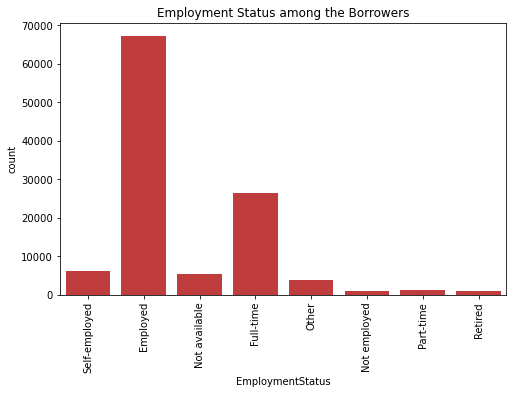

In [5]:
#This is a color I select from color_palette() method of seaborn to be used on some charts
mycolor=sb.color_palette()[3]

# Visualing the employment status of the borrowers using bar chart
plt.figure(figsize=[8, 5])
sb.countplot(data = target_df, x = 'EmploymentStatus', color = mycolor);
plt.xticks(rotation = 90);
plt.title('Employment Status among the Borrowers')

## Loan Status

**Observation (s):** 
- The loan status is mostly Current
- After Current status of the loan, the second frequent Status is Completed
- The Past Due loans are categorized based on how long is the due.

Text(0.5, 1.0, 'Loan Status among the Borrowers')

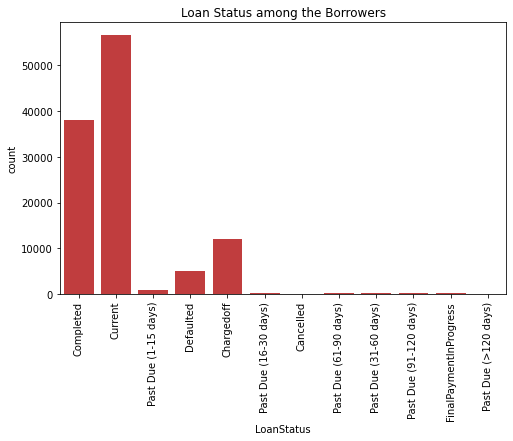

In [6]:
# Visualing the loan status of the borrowers using bar chart
plt.figure(figsize=[8, 5])
sb.countplot(data = target_df, x = 'LoanStatus', color = mycolor);
plt.xticks(rotation = 90);
plt.title('Loan Status among the Borrowers')

In [7]:
#Making a copy of my data
target_df2=target_df.copy()

In [8]:
#Reframing the data structure for proper plotting
condition = (target_df2['LoanStatus'] == 'Completed') | (target_df2['LoanStatus'] == 'Defaulted') |\
                  (target_df2['LoanStatus'] == 'Chargedoff')
target_df2 = target_df2[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df2['LoanStatus'] = target_df2.apply(change_to_defaulted, axis=1)
target_df2['LoanStatus'].value_counts()

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

In [9]:
#Changing ListingCategory feature to Categorical
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df2['ListingCategory (numeric)'] = target_df2.apply(reduce_categorie, axis=1)
target_df2['ListingCategory (numeric)'].value_counts()

Other                 28177
Debt Consolidation    17867
Business               4257
Home Improvement       3244
Auto                   1539
Name: ListingCategory (numeric), dtype: int64

## The relationship between Loan Status and the Total Prosper Loans
**Observation (s):**
* Borrowers that have least amount of prior loans are the one that completed their loans the most.

Text(0.5, 1.0, 'Loan Status Vs Total Prosper Loans')

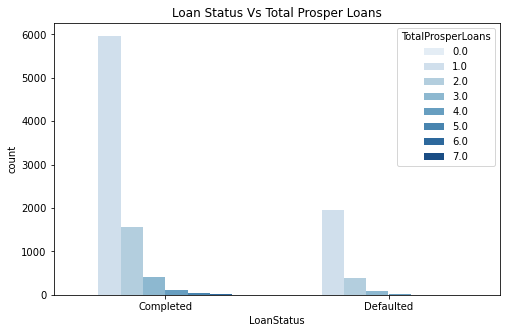

In [10]:
plt.figure(figsize = [8, 5])
sb.countplot(data = target_df2, x = 'LoanStatus', hue = 'TotalProsperLoans', palette = 'Blues')
plt.title('Loan Status Vs Total Prosper Loans')

## Relationship between Loan Status and the Loan Original Amount
**Observation (s):**
* `Defaulted credits` tend to be having `smaller` loan amount than `completed credits` onces

Text(0.5, 1.0, 'Loan Status Vs Loan Original Amount')

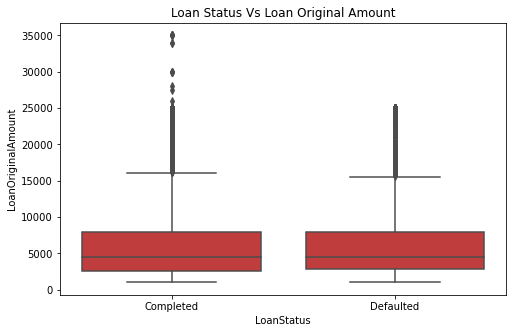

In [11]:
plt.figure(figsize=[8,5])
sb.boxplot(data = target_df2, x = 'LoanStatus', y = 'LoanOriginalAmount', color = mycolor);
plt.title('Loan Status Vs Loan Original Amount')

## Employment Status, Loan Original Amount and the Loan Status:

- The plot shows that, Borrowers with *Employed* status tends Complete their loan despite the Loan Original Amount being the highest.

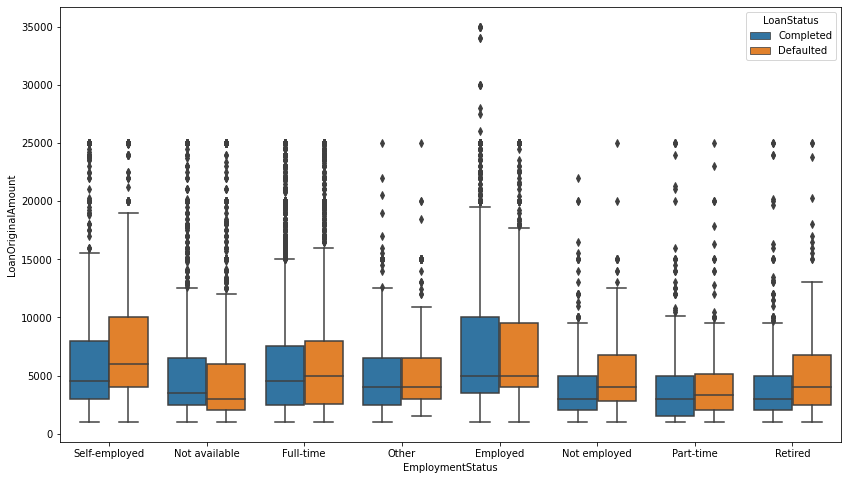

In [12]:
#employment status, Loan Amount and Loan Status
plt.figure(figsize = [14, 8])
sb.boxplot(data=target_df2, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus');

In [ ]:
!jupyter nbconvert Part2_Explanatory_Data_Visualization.ipynb --to slides --post serve --no-input --no-prompt